Problem to solve:

predict whether the Luxembourg index (LUXXX) exceeds a return of 0.25% in any direction

predictors are a combination of country indices and technical indicators.

In [ ]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

data_df = pd.read_excel("/content/test.xlsx")
data_df['Date'] = pd.to_datetime(data_df["Date"])

In [ ]:
data_df.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,2016-01-01,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,2016-01-08,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,2016-01-15,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,2016-01-22,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,2016-01-29,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


In [ ]:
target_ETF = 'LUXXX'

ETF_features = data_df.loc[:, ~data_df.columns.isin(["Date", target_ETF])].columns
data_df[ETF_features] = data_df[ETF_features].pct_change()

data_df[target_ETF + "_returns"] = data_df[target_ETF].pct_change()

data_df[target_ETF + "_returns" + "_Shift"] = data_df[target_ETF + "_returns"].shift(-1)

data_df["Target"] = np.where(
    (data_df[target_ETF + "_returns_Shift"].abs() > 0.025), 1, 0
)

In [ ]:
data_df.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA,LUXXX_returns,LUXXX_returns_Shift,Target
0,2016-01-01,1390.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071509,1
1,2016-01-08,1291.267,-0.048580,-0.069555,-0.059160,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,...,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.060430,-0.071509,-0.026471,1
2,2016-01-15,1257.086,-0.019174,-0.049493,-0.020068,-0.042187,-0.020433,-0.049758,-0.028433,-0.056562,...,-0.044990,-0.037393,-0.036238,-0.033456,-0.017939,-0.017172,-0.023102,-0.026471,-0.002322,0
3,2016-01-22,1254.167,0.029078,-0.058760,0.000497,0.024054,0.035039,-0.028155,0.026618,-0.007567,...,-0.016701,0.023604,0.019211,0.042495,0.019384,0.016060,0.013724,-0.002322,0.035141,1
4,2016-01-29,1298.240,0.078971,0.067806,0.019972,0.011901,0.023032,0.090767,0.035864,0.019159,...,0.018555,0.068161,0.008568,-0.003501,0.009931,0.031862,0.016405,0.035141,-0.018185,0


In [ ]:
#four country indices used
feats = ["MSCI KOREA", "MSCI DENMARK", "MSCI FRANCE", "MSCI NORWAY"]

# creating the technical indicators

data_df["SMA_5"] = data_df[target_ETF].rolling(5).mean()
data_df["SMA_15"] = data_df[target_ETF].rolling(15).mean()
data_df["SMA_ratio"] = data_df["SMA_15"] / data_df["SMA_5"]

data_df.drop(["SMA_5", "SMA_15"], axis =1 , inplace = True)

data_df["Diff"] = data_df[target_ETF] - data_df[target_ETF].shift(1)
data_df["Up"] = data_df["Diff"]
data_df.loc[(data_df["Up"] < 0 ), "Up"] = 0

data_df["Down"] = data_df["Diff"]
data_df.loc[(data_df["Down"] > 0), "Down"] = 0
data_df["Down"] = abs(data_df["Down"])

data_df["avg_5up"] = data_df["Up"].rolling(5).mean()
data_df["avg_5down"] = data_df["Down"].rolling(5).mean()

data_df["avg_15up"] = data_df["Up"].rolling(15).mean()
data_df["avg_15down"] = data_df["Down"].rolling(15).mean()

data_df["RS_5"] = data_df["avg_5up"] / data_df["avg_5down"]
data_df["RS_15"] = data_df["avg_15up"] / data_df["avg_15down"]

data_df["RSI_5"] = 100 - (100 / (1 + data_df["RS_5"]))
data_df["RSI_15"] = 100 - (100 / (1 + data_df["RS_15"]))

data_df["RSI_ratio"] = data_df["RSI_5"] / data_df["RSI_15"]

data_df.drop(
    ["Diff", "Up", "Down", "avg_5up", "avg_5down", "avg_15up", "avg_15down"],
    axis = 1,
    inplace = True
)

data_df["RC"] = data_df[target_ETF].pct_change(periods = 15)

feats.append("SMA_ratio")
feats.append("RSI_ratio")
feats.append("RC")


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


In [ ]:
NoNaN_df  = data_df.dropna()
X = NoNaN_df[feats]

X = X.iloc[:, :]
y = NoNaN_df.loc[:, "Target"]

del NoNaN_df

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

In [ ]:
bagmodel = RandomForestClassifier(n_estimators = 10, random_state = 4)

In [ ]:
bagmodel.fit(X_train, y_train)

print("Accuracy on train set: %0.4f" % (bagmodel.score(X_train, y_train)))
print("Accuray on test set: %0.4f" % (bagmodel.score(X_test, y_test)))

Accuracy on train set: 0.9787
Accuray on test set: 0.5208


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    "n_estimators" : [10],
    "max_depth" : [2, 3, 4],
    "min_samples_split" : [2, 4, 8],
}
grid = GridSearchCV(
    RandomForestClassifier(random_state = 8), param_grid, refit = True, verbose = 3, cv = 3
)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.698 total time=   0.1s
[CV 2/3] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.651 total time=   0.1s
[CV 3/3] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.661 total time=   0.1s
[CV 1/3] END max_depth=2, min_samples_split=4, n_estimators=10;, score=0.698 total time=   0.1s
[CV 2/3] END max_depth=2, min_samples_split=4, n_estimators=10;, score=0.651 total time=   0.1s
[CV 3/3] END max_depth=2, min_samples_split=4, n_estimators=10;, score=0.661 total time=   0.1s
[CV 1/3] END max_depth=2, min_samples_split=8, n_estimators=10;, score=0.698 total time=   0.1s
[CV 2/3] END max_depth=2, min_samples_split=8, n_estimators=10;, score=0.635 total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_split=8, n_estimators=10;, score=0.694 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_split=2, n_estimators=10;, score=0.683

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [2, 4, 8],
                         'n_estimators': [10]},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 10}
RandomForestClassifier(max_depth=4, n_estimators=10, random_state=8)


In [ ]:
bagmodel_tuned = RandomForestClassifier(
    n_estimators = 10,
    max_depth = grid.best_params_["max_depth"] ,
    min_samples_split = grid.best_params_["min_samples_split"],
)
bagmodel_tuned.fit(X_train, y_train)
print("Accuracy on test set: %0.4f" % (bagmodel_tuned.score(X_test, y_test)))


Accuracy on test set: 0.6250


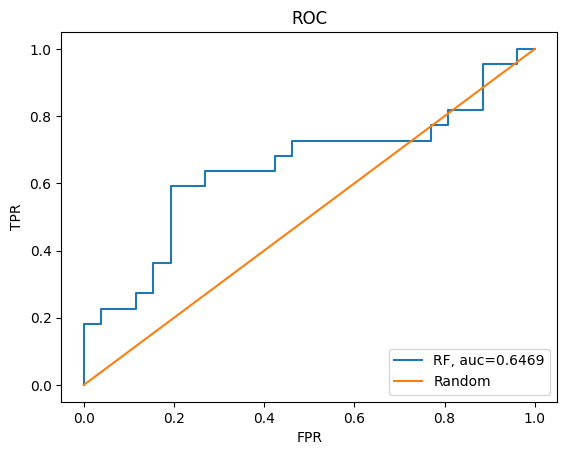

In [ ]:
import matplotlib.pyplot as plt

# Performance
from sklearn.metrics import roc_auc_score, roc_curve

# predicted probabilities generated by tuned classifier
y_pred_proba = bagmodel_tuned.predict_proba(X_test)

# RF ROC dependencies
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)

# RF Model
plt.plot(fpr, tpr, label="RF, auc=" + str(auc))

# Random guess model
plt.plot(fpr, fpr, "-", label="Random")
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")

plt.legend(loc=4)
plt.show()

stacking


base models = "Gaussian Naive Bayes", "Decision Tree", "SVM classifiers"

meta model = Logistic regression

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf1 = DecisionTreeClassifier(random_state = 2)
clf2 = SVC(kernel = 'rbf', random_state = 2)
clf3 = GaussianNB()

est_rs = [("DTree", clf1), ("SVM", clf2), ("NB", clf3)]


In [ ]:
mylr = LogisticRegression(random_state = 2)

In [ ]:
stackingCLF = StackingClassifier(
    estimators = est_rs, final_estimator= mylr, stack_method = "auto", cv = 3
)

In [ ]:
stackingCLF.fit(X_train, y_train)
acc_score = stackingCLF.score(X_train, y_train)
round(acc_score, 4)


0.7021

In [ ]:
for iterclf, iterlabel in zip([clf1, clf2, clf3], ["DTree", "SVM", "NB"]):
    scores = model_selection.cross_val_score(
        iterclf, X_train, y_train, cv = 3, scoring = "accuracy"
    )
    print("accuracy : %0.3f %s " % (scores.mean(), iterlabel))

accuracy : 0.559 DTree 
accuracy : 0.697 SVM 
accuracy : 0.686 NB 


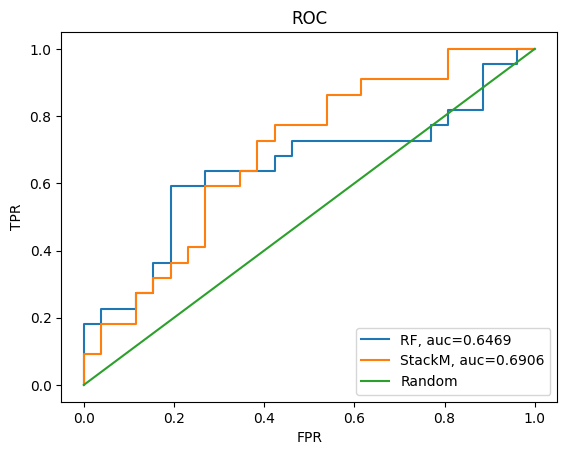

In [ ]:
# predicted probabilities generated by tuned classifier
y_pred_probaStack = stackingCLF.predict_proba(X_test)

# Stacking Model ROC dependencies
fpr, tpr, _ = roc_curve(y_test, y_pred_probaStack[:, 1])
auc = round(roc_auc_score(y_test, y_pred_probaStack[:, 1]), 4)

# RF ROC dependencies
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc_RF = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)

# RF Model
plt.plot(fpr_RF, tpr_RF, label="RF, auc=" + str(auc_RF))
# Stacking Model
plt.plot(fpr, tpr, label="StackM, auc=" + str(auc))

# Random guess model
plt.plot(fpr, fpr, "-", label="Random")
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")

plt.legend(loc=4)
plt.show()